# Summarize Course Evaluations

In [1]:
print("Python Notebook to summarize course evaluations!")

Python Notebook to summarize course evaluations!


In [2]:
# Installation of libraries
!pip install squarify
!pip install transformers

Defaulting to user installation because normal site-packages is not writeable
Defaulting to user installation because normal site-packages is not writeable


## Data Analysis

### Load Questions and Responses from CSV

`

In [4]:
!pip install matplotlib

Defaulting to user installation because normal site-packages is not writeable
     ---------------------------------------- 0.0/165.9 kB ? eta -:--:--
     ------------------------------------- 165.9/165.9 kB 10.4 MB/s eta 0:00:00
   ---------------------------------------- 0.0/8.0 MB ? eta -:--:--
   -- ------------------------------------- 0.6/8.0 MB 12.0 MB/s eta 0:00:01
   ----- ---------------------------------- 1.1/8.0 MB 14.0 MB/s eta 0:00:01
   -------- ------------------------------- 1.6/8.0 MB 11.7 MB/s eta 0:00:01
   ---------- ----------------------------- 2.2/8.0 MB 12.7 MB/s eta 0:00:01
   ------------- -------------------------- 2.8/8.0 MB 11.7 MB/s eta 0:00:01
   ---------------- ----------------------- 3.3/8.0 MB 12.4 MB/s eta 0:00:01
   ------------------- -------------------- 3.9/8.0 MB 11.7 MB/s eta 0:00:01
   ---------------------- ----------------- 4.4/8.0 MB 11.8 MB/s eta 0:00:01
   ------------------------ --------------- 5.0/8.0 MB 12.2 MB/s eta 0:00:01
   ----

  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.


In [5]:
# Importing the libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [6]:
!pip install seaborn

Defaulting to user installation because normal site-packages is not writeable
   ---------------------------------------- 0.0/294.9 kB ? eta -:--:--
   ---------------------------------------- 294.9/294.9 kB 9.2 MB/s eta 0:00:00


In [7]:
# additional libraries
import seaborn as sbn
import squarify as sqfy

In [8]:
# hugging face transformers
from transformers import pipeline

In [9]:
import os

In [26]:
# Config variables
_DATA_FILE_QUESTIONS_ = r"C:\Users\mmavurap\Desktop\Gitlab Codes\CommentSummarization\src\questions.csv"
_DATA_FILE_RESPONSES_ = r"C:\Users\mmavurap\Desktop\Gitlab Codes\CommentSummarization\src\data.csv"

#### Load Data

In [28]:
# Load questions
df_questions = pd.read_csv(_DATA_FILE_QUESTIONS_, encoding='cp1252')

In [29]:
# Load responses
df_responses = pd.read_csv(_DATA_FILE_RESPONSES_, encoding='cp1252')

C:\Users\mmavurap\AppData\Local\Temp\ipykernel_50412\3111224405.py:2: DtypeWarning: Columns (9,10,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29) have mixed types. Specify dtype option on import or set low_memory=False.
  df_responses = pd.read_csv(_DATA_FILE_RESPONSES_, encoding='cp1252')


In [31]:
# Inspect questions dataframe
print("\nQuestions dataframe:")
print(df_questions.info())
print("-"*50)
# number of rows
print("Number of questions: ", len(df_questions))
print("-"*50)
print(df_questions.head())
print("-"*50)


Questions dataframe:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 81 entries, 0 to 80
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   FormNumber  81 non-null     int64  
 1   Question    81 non-null     object 
 2   Unnamed: 2  0 non-null      float64
dtypes: float64(1), int64(1), object(1)
memory usage: 2.0+ KB
None
--------------------------------------------------
Number of questions:  81
--------------------------------------------------
   FormNumber                                           Question  Unnamed: 2
0           6  Please use the space below for your comments o...         NaN
1           7  Course Comments | Comments on how the course m...         NaN
2           7  Instructor Comments | Comments related to the ...         NaN
3           9  What, specifically, were the strengths of the ...         NaN
4           9       How could the instructor improve the course?         NaN
---------------

In [32]:
# questions stats
print("\nQuestions stats:")
# how many different forms are there (unique FormNumber)
print("Number of unique forms: ", df_questions['FormNumber'].nunique())
# min # of questions for a form
print("Min # of questions for a form: ", df_questions.groupby('FormNumber').size().min())
# max # of questions for a form
print("Max # of questions for a form: ", df_questions.groupby('FormNumber').size().max())
# avg # of questions for a form
print("Avg # of questions for a form: ", df_questions.groupby('FormNumber').size().mean())


Questions stats:
Number of unique forms:  38
Min # of questions for a form:  1
Max # of questions for a form:  7
Avg # of questions for a form:  2.1315789473684212


Text(0, 0.5, 'Number of forms')

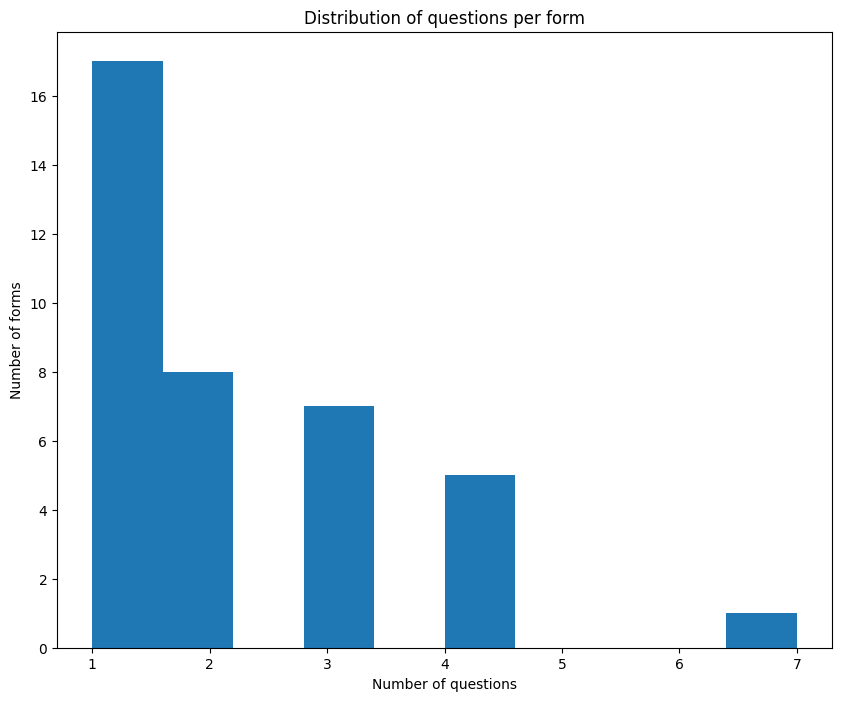

In [33]:
# let's plot the data to see the distribution of questions per form
# label the graph too, and provide x and y axis labels
# i want to set size of the images, how do i do that?

plt.figure(figsize=(10, 8))

df_questions.groupby('FormNumber').size().plot(kind='hist', bins=10)
plt.title('Distribution of questions per form')
plt.xlabel('Number of questions')
plt.ylabel('Number of forms')



Text(0, 0.5, 'Number of questions')

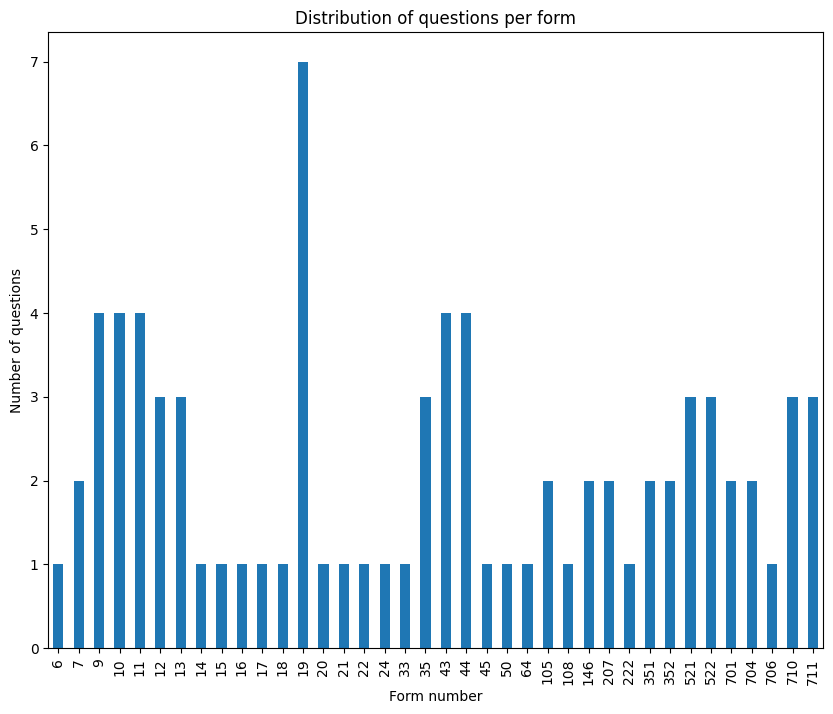

In [34]:
# what other kinds of plots can i make for this data?
# how about a bar plot?
plt.figure(figsize=(10, 8))
df_questions.groupby('FormNumber').size().plot(kind='bar')
plt.title('Distribution of questions per form')
plt.xlabel('Form number')
plt.ylabel('Number of questions')



In [35]:

# unique questions count
print("\nUnique questions count:")
print(df_questions['Question'].nunique())
print("-"*50)

# list unique questions
# print("\nUnique questions:")
# print(df_questions['Question'].unique())


Unique questions count:
48
--------------------------------------------------


In [36]:
# now we analyze the reponses dataframe

# Inspect responses dataframe
print("\nResponses dataframe:")
print(df_responses.info())
print("-"*50)
# number of rows
print("Number of responses: ", len(df_responses))
print("-"*50)
# first 5 rows
print(df_responses.head())


Responses dataframe:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 96617 entries, 0 to 96616
Data columns (total 35 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   InstructorName  96424 non-null  object 
 1   InstrModeDescr  96617 non-null  object 
 2   Component       96617 non-null  object 
 3   Career          96617 non-null  object 
 4   AcadGroup       96617 non-null  int64  
 5   Subject         96617 non-null  object 
 6   Catalog         96617 non-null  int64  
 7   ClassNbr        96617 non-null  object 
 8   Term            96617 non-null  int64  
 9   SessionCode     96617 non-null  object 
 10  distanceed      96617 non-null  object 
 11  EvaluationForm  96617 non-null  int64  
 12  Comment1        35224 non-null  object 
 13  Column2         22892 non-null  object 
 14  Comment2        18452 non-null  object 
 15  Column3         8531 non-null   object 
 16  Comment3        2548 non-null   object 
 17  Column4  

Text(0.5, 1.0, 'Responses by Career')

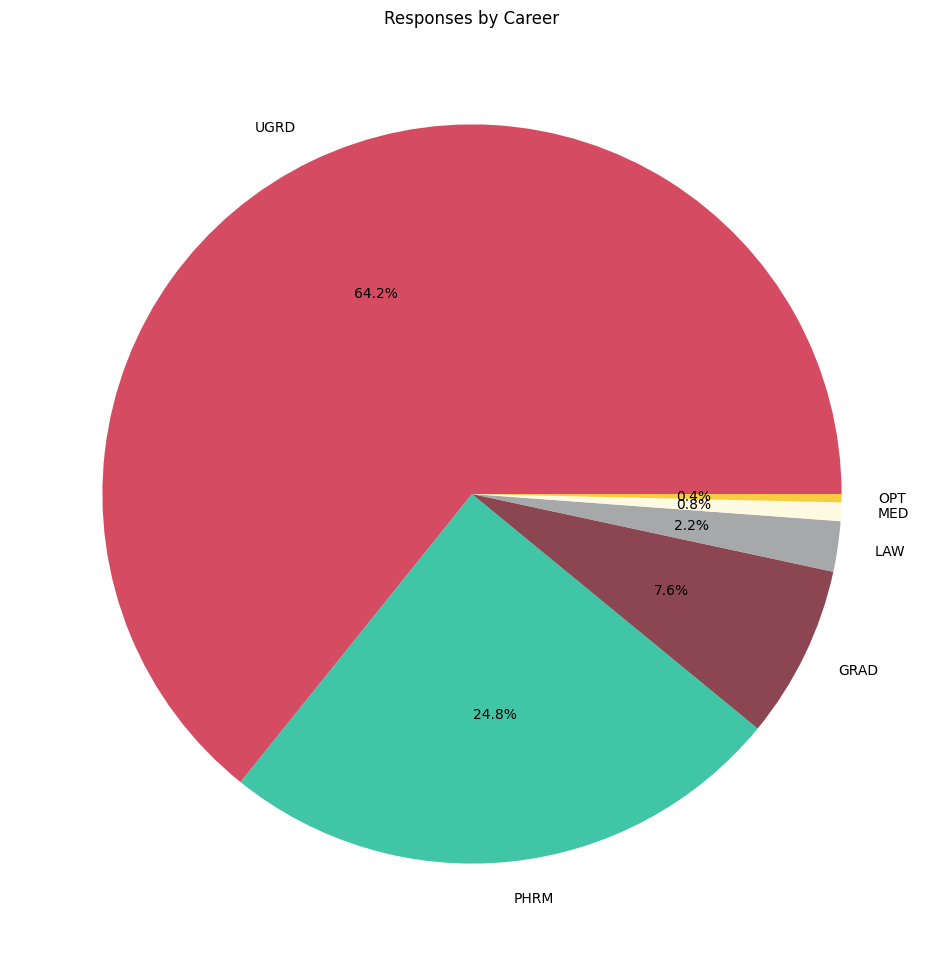

In [37]:
# pie chart of responses by Career
# There are six Careers : UGRD, GRAD, PHRM, LAW, MED, OPT
# we set 6 bold colors
colors_career = ['#C8102E', '#00B388', '#640817', '#888B8D', '#FFF9D9', '#F6BE00']


fig = plt.figure(figsize=(15, 12))
fig.set_facecolor('white')
df_responses['Career'].value_counts().plot(kind='pie', autopct='%1.1f%%', wedgeprops={'alpha':0.75}, colors=colors_career)
plt.ylabel('')
plt.title('Responses by Career')


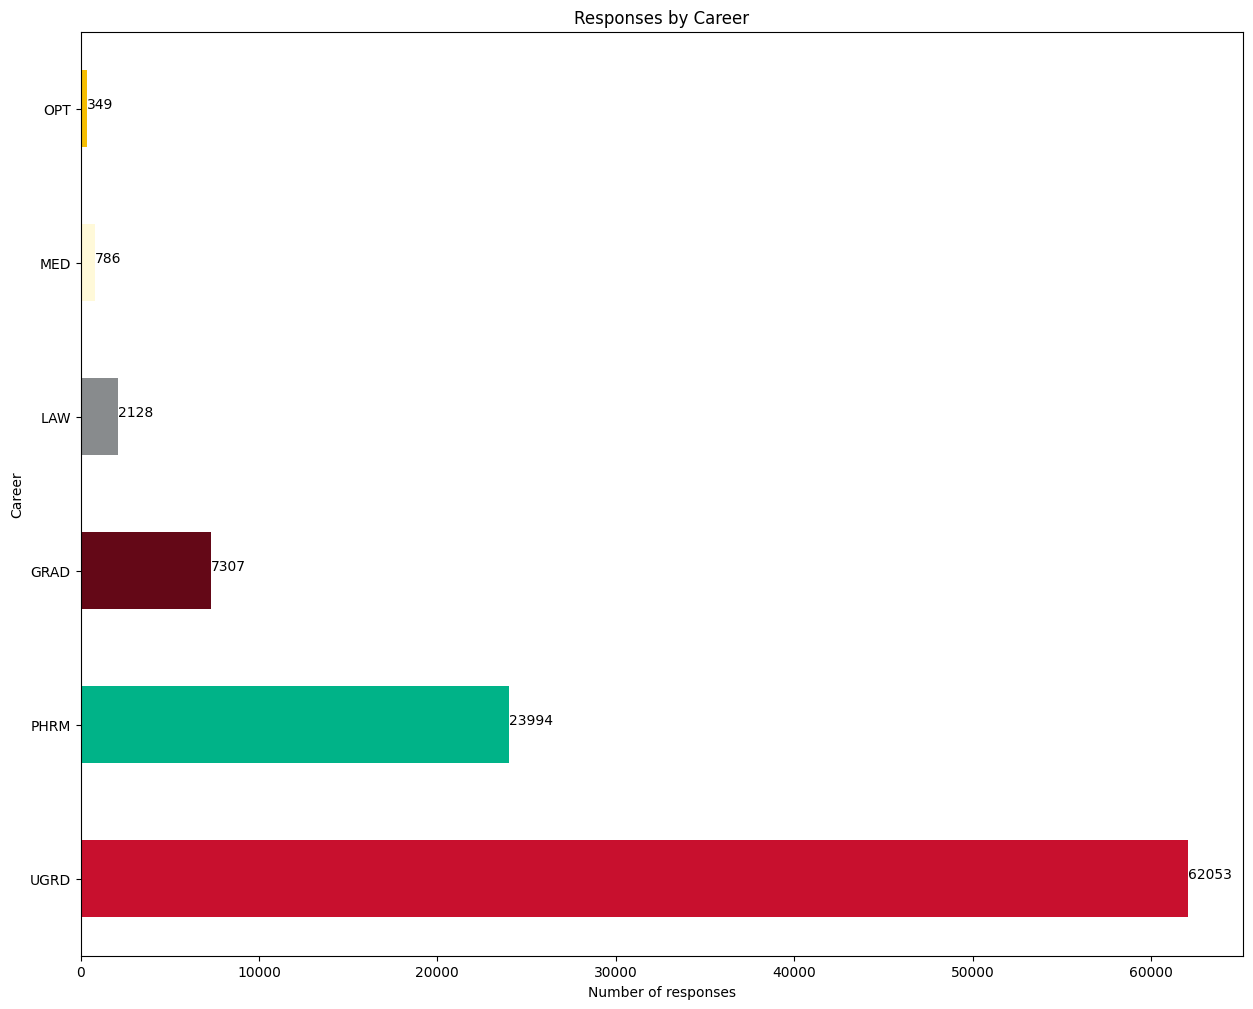

In [38]:
# horizontal bar chart of responses by Career
# how to use different colors for the bars?

fig = plt.figure(figsize=(15, 12))
fig.set_facecolor('white')
df_responses['Career'].value_counts().plot(kind='barh', color=colors_career)
plt.title('Responses by Career')
plt.xlabel('Number of responses')
plt.ylabel('Career')
# show values on bars
for index, value in enumerate(df_responses['Career'].value_counts()):
    plt.text(value, index, str(value))


Text(0.5, 1.0, 'Responses by Instruction Mode')

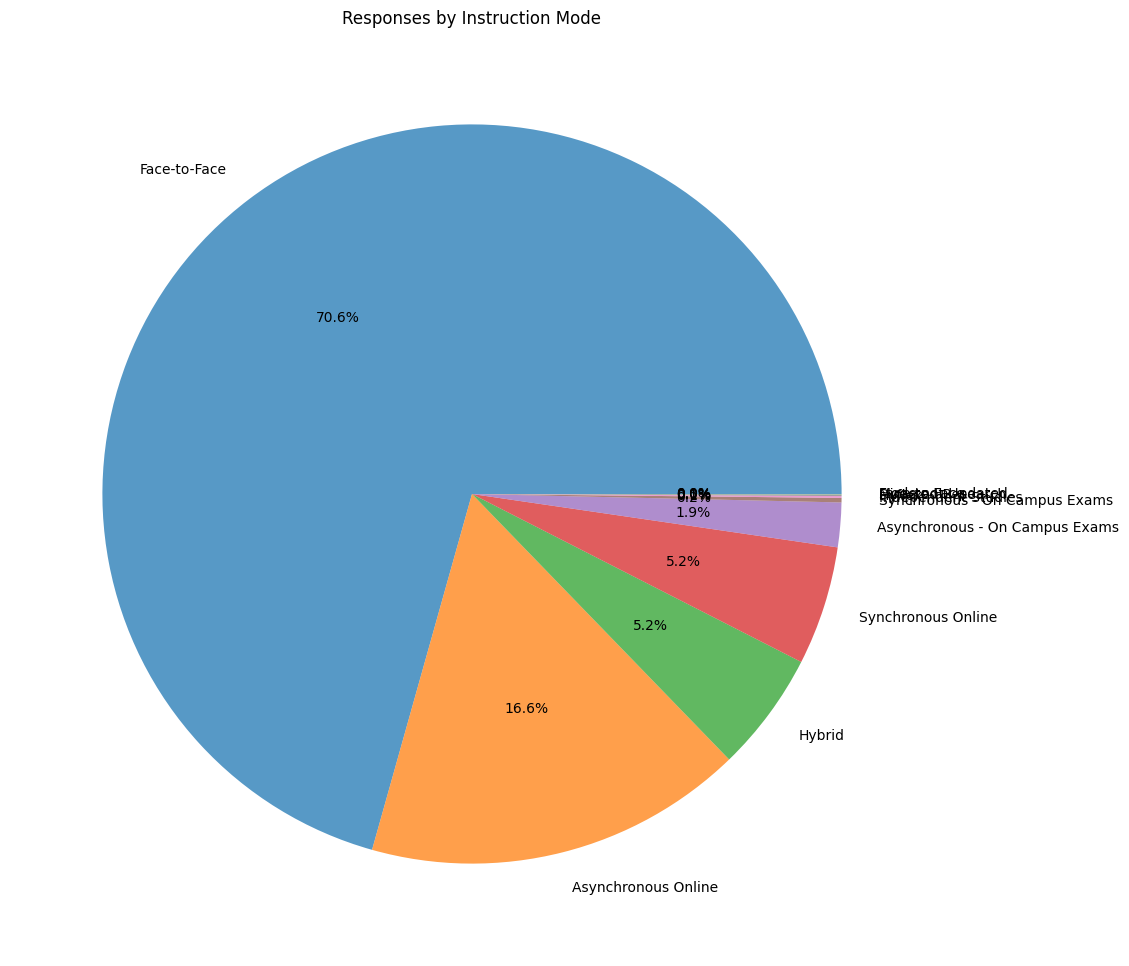

In [39]:
# Pie chart of responses by InstrModeDescr
fig = plt.figure(figsize=(15, 12))
fig.set_facecolor('white')
df_responses['InstrModeDescr'].value_counts().plot(kind='pie', autopct='%1.1f%%', wedgeprops={'alpha':0.75})
plt.ylabel('')  
plt.title('Responses by Instruction Mode')


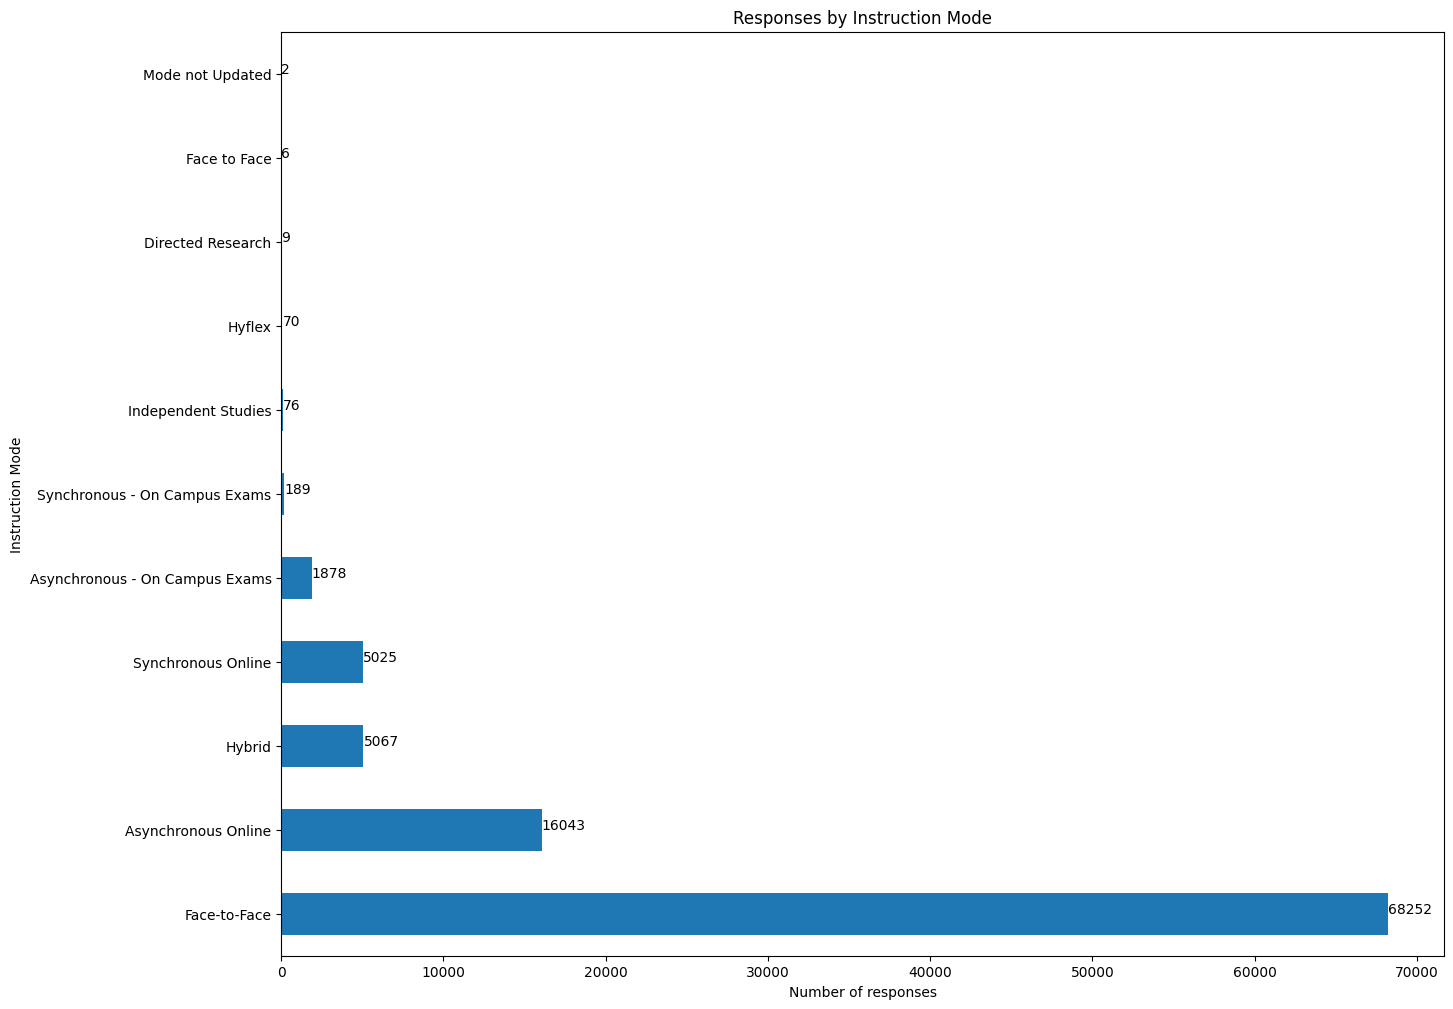

In [40]:
# horizontal bar chart of responses by InstrModeDescr
fig = plt.figure(figsize=(15, 12))
fig.set_facecolor('white')
df_responses['InstrModeDescr'].value_counts().plot(kind='barh')
plt.title('Responses by Instruction Mode')
plt.xlabel('Number of responses')
plt.ylabel('Instruction Mode')
# show values on bars
for index, value in enumerate(df_responses['InstrModeDescr'].value_counts()):
    plt.text(value, index, str(value))

<Axes: ylabel='count'>

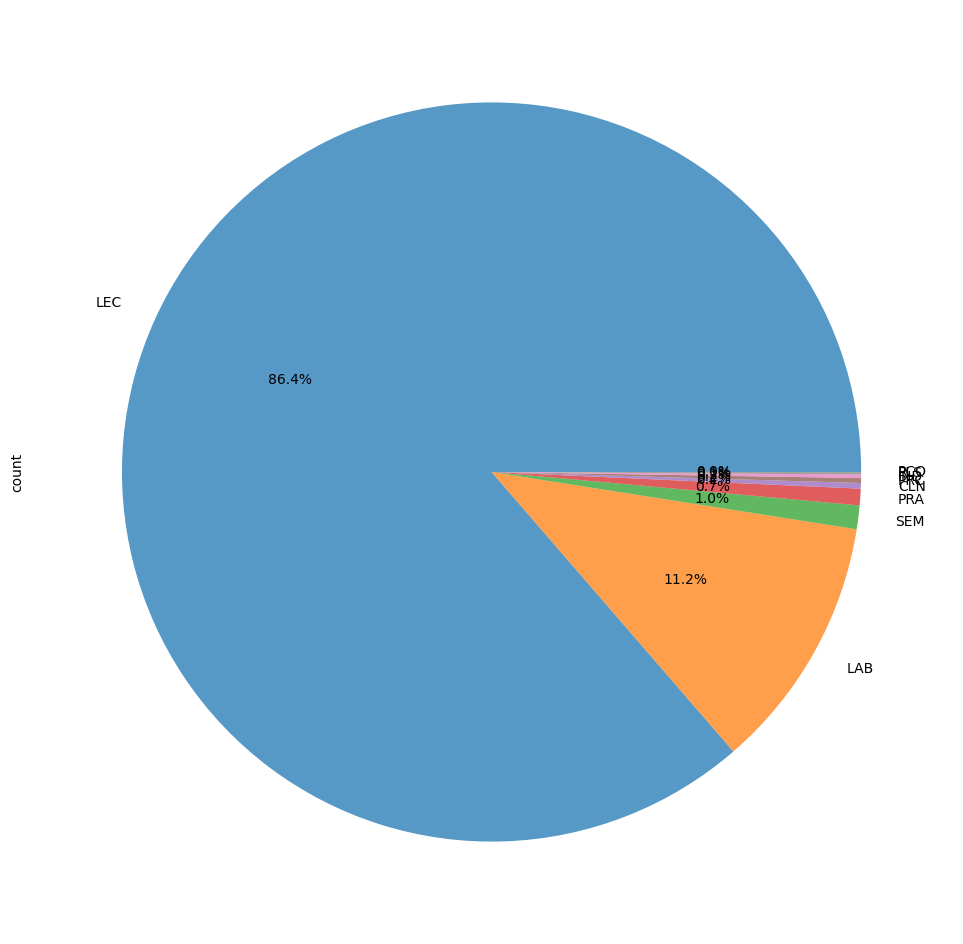

In [41]:
# responses by component (lecture/lab etc)
fig = plt.figure(figsize=(15, 12))
fig.set_facecolor('white')
df_responses['Component'].value_counts().plot(kind='pie', autopct='%1.1f%%', wedgeprops={'alpha':0.75})

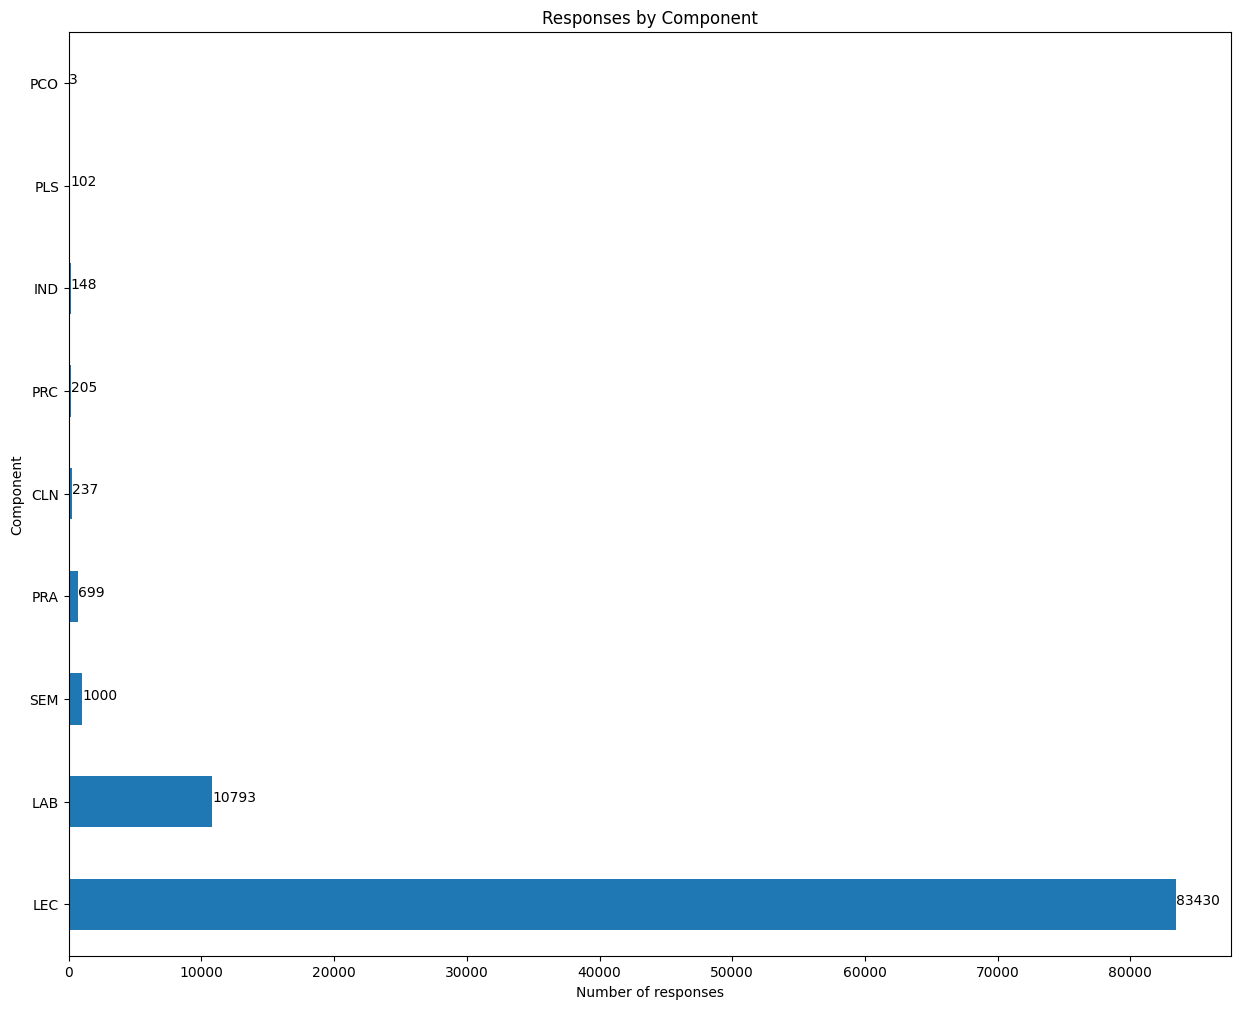

In [42]:
# horizontal bar chart responses by component (lecture/lab etc) 
fig = plt.figure(figsize=(15, 12))
fig.set_facecolor('white')
df_responses['Component'].value_counts().plot(kind='barh')
plt.title('Responses by Component')
plt.xlabel('Number of responses')
plt.ylabel('Component')
# show values on bars
for index, value in enumerate(df_responses['Component'].value_counts()):
    plt.text(value, index, str(value))


In [43]:
# list distinct acad groups
print("\nDistinct academic groups:")
print(df_responses['AcadGroup'].unique())


Distinct academic groups:
[730  90  99  70  60  48  55  25  30  46  47  40  35  15  37  23  45  65
  50]


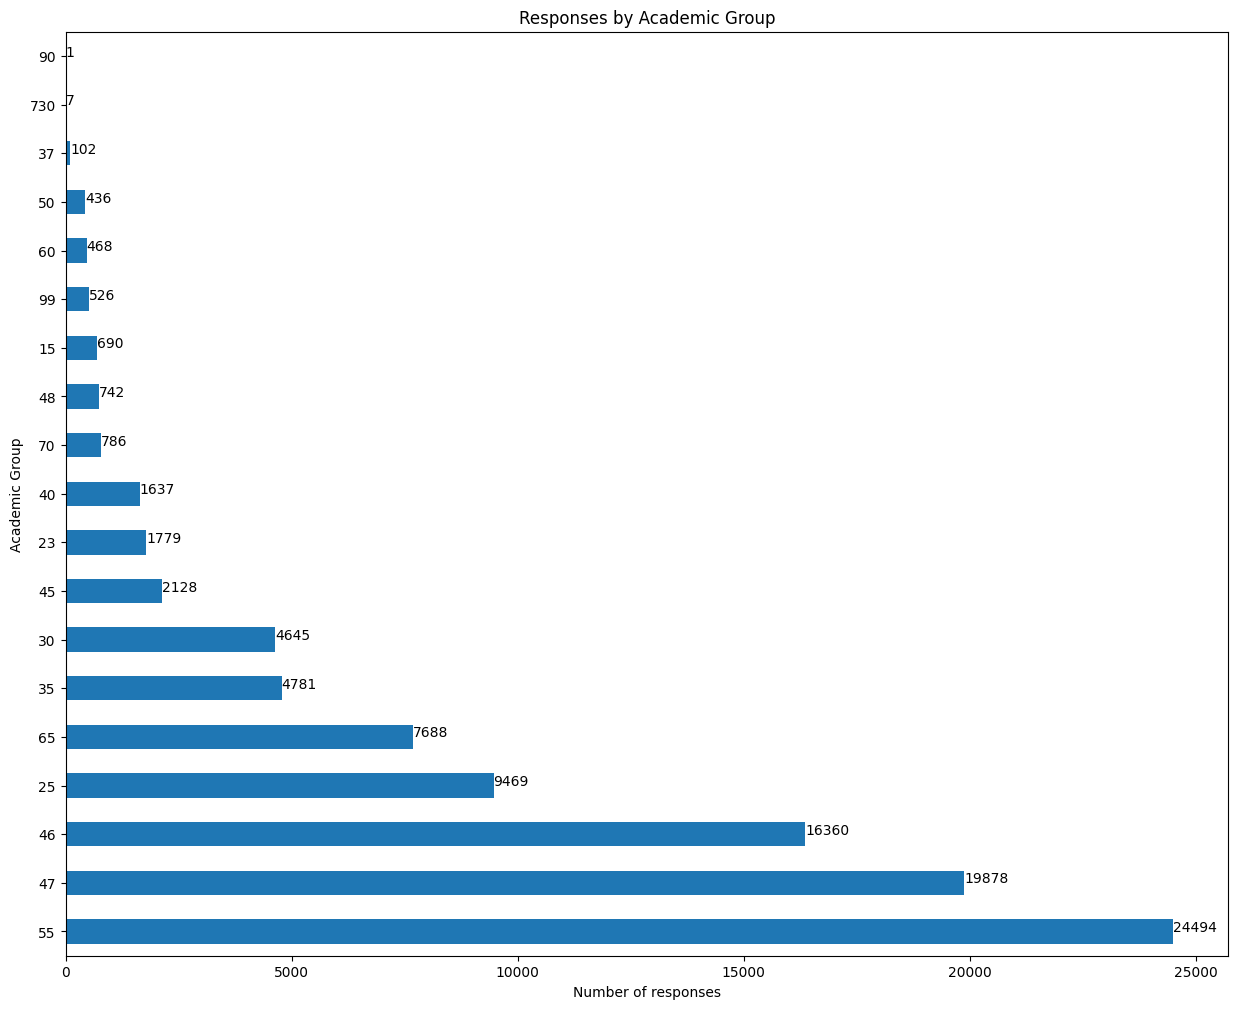

In [44]:
# horizontal bar chart of responses by acad group
fig = plt.figure(figsize=(15, 12))
fig.set_facecolor('white')
df_responses['AcadGroup'].value_counts().plot(kind='barh')
plt.title('Responses by Academic Group')
plt.xlabel('Number of responses')
plt.ylabel('Academic Group')
# show values on bars
for index, value in enumerate(df_responses['AcadGroup'].value_counts()):
    plt.text(value, index, str(value))

<Axes: >

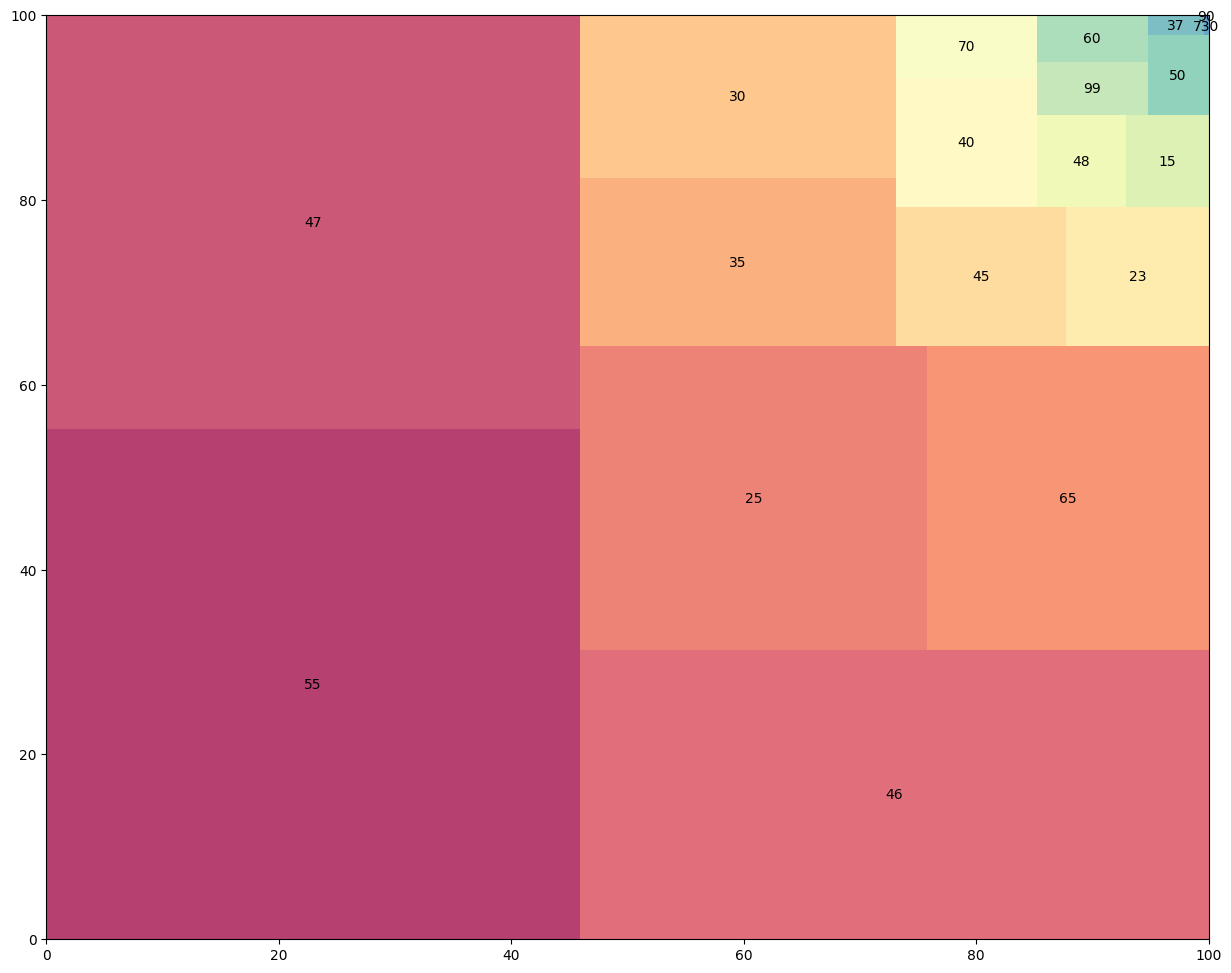

In [45]:
# tree map by acad group
plt.figure(figsize=(15, 12))
sizes = df_responses['AcadGroup'].value_counts().values
labels = df_responses['AcadGroup'].value_counts().index
colors = [plt.cm.Spectral(i/float(len(labels))) for i in range(len(labels))]
sqfy.plot(sizes=sizes, label=labels, color=colors, alpha=0.75)

In [46]:
# list distinct subjects
print("\nDistinct subjects:")
print(df_responses['Subject'].unique())


Distinct subjects:
['II' 'CORE' 'HON' 'ENRG' 'MEDI' 'SOCW' 'NURS' 'PHAR' 'PCEU' 'PCOL' 'PHCA'
 'ACCT' 'ENTR' 'FINA' 'MANA' 'MARK' 'MIS' 'STAT' 'SCM' 'GENB' 'INTB'
 'BZAN' 'BUSI' 'BCIS' 'CUIN' 'EDUC' 'ELED' 'HDFS' 'HLT' 'ELCS' 'EDRS'
 'ARED' 'PHLS' 'SPEC' 'AAMS' 'SEDE' 'PHED' 'SAER' 'PHIL' 'AAS' 'AFSC'
 'ANTH' 'ARAB' 'COMD' 'COMM' 'ECON' 'ENGL' 'FREN' 'GERM' 'HIST' 'ITAL'
 'KIN' 'MAS' 'MSCI' 'NUTR' 'PSYC' 'RELS' 'SOC' 'SPAN' 'VIET' 'WCL' 'PEP'
 'POLS' 'ILAS' 'ASLI' 'ATP' 'NAVY' 'WGSS' 'LACP' 'INDI' 'IRW' 'NSS' 'HISP'
 'CHIN' 'SPCH' 'LATI' 'SOCI' 'GOVT' 'SGNL' 'CLAS' 'JWST' 'JAPN' 'KORE'
 'POPH' 'GEOL' 'PHYS' 'BCHS' 'BIOL' 'CHEM' 'COSC' 'MATH' 'IDNS' 'GHL'
 'BIOE' 'CHEE' 'CIVE' 'ECE' 'ENGI' 'INDE' 'MECE' 'PETR' 'MTLS' 'SPAC'
 'EGRP' 'IEEM' 'ENGR' 'EDS' 'GCEE' 'SUBS' 'ARCH' 'INDS' 'INAR' 'POLC'
 'MUSA' 'THEA' 'ARLD' 'ARTH' 'MUSI' 'MUED' 'DANC' 'DRAM' 'ARTS' 'IART'
 'MUTX' 'LAW' 'CNST' 'ELET' 'HDCS' 'ITEC' 'MECT' 'TECH' 'TEPM' 'BTEC'
 'HRD' 'DIGM' 'SCLT' 'CIS' 'FORE' 'TMTH' 'GRET' 'TLIM' 

Text(0.5, 1.0, 'Responses by Subject')

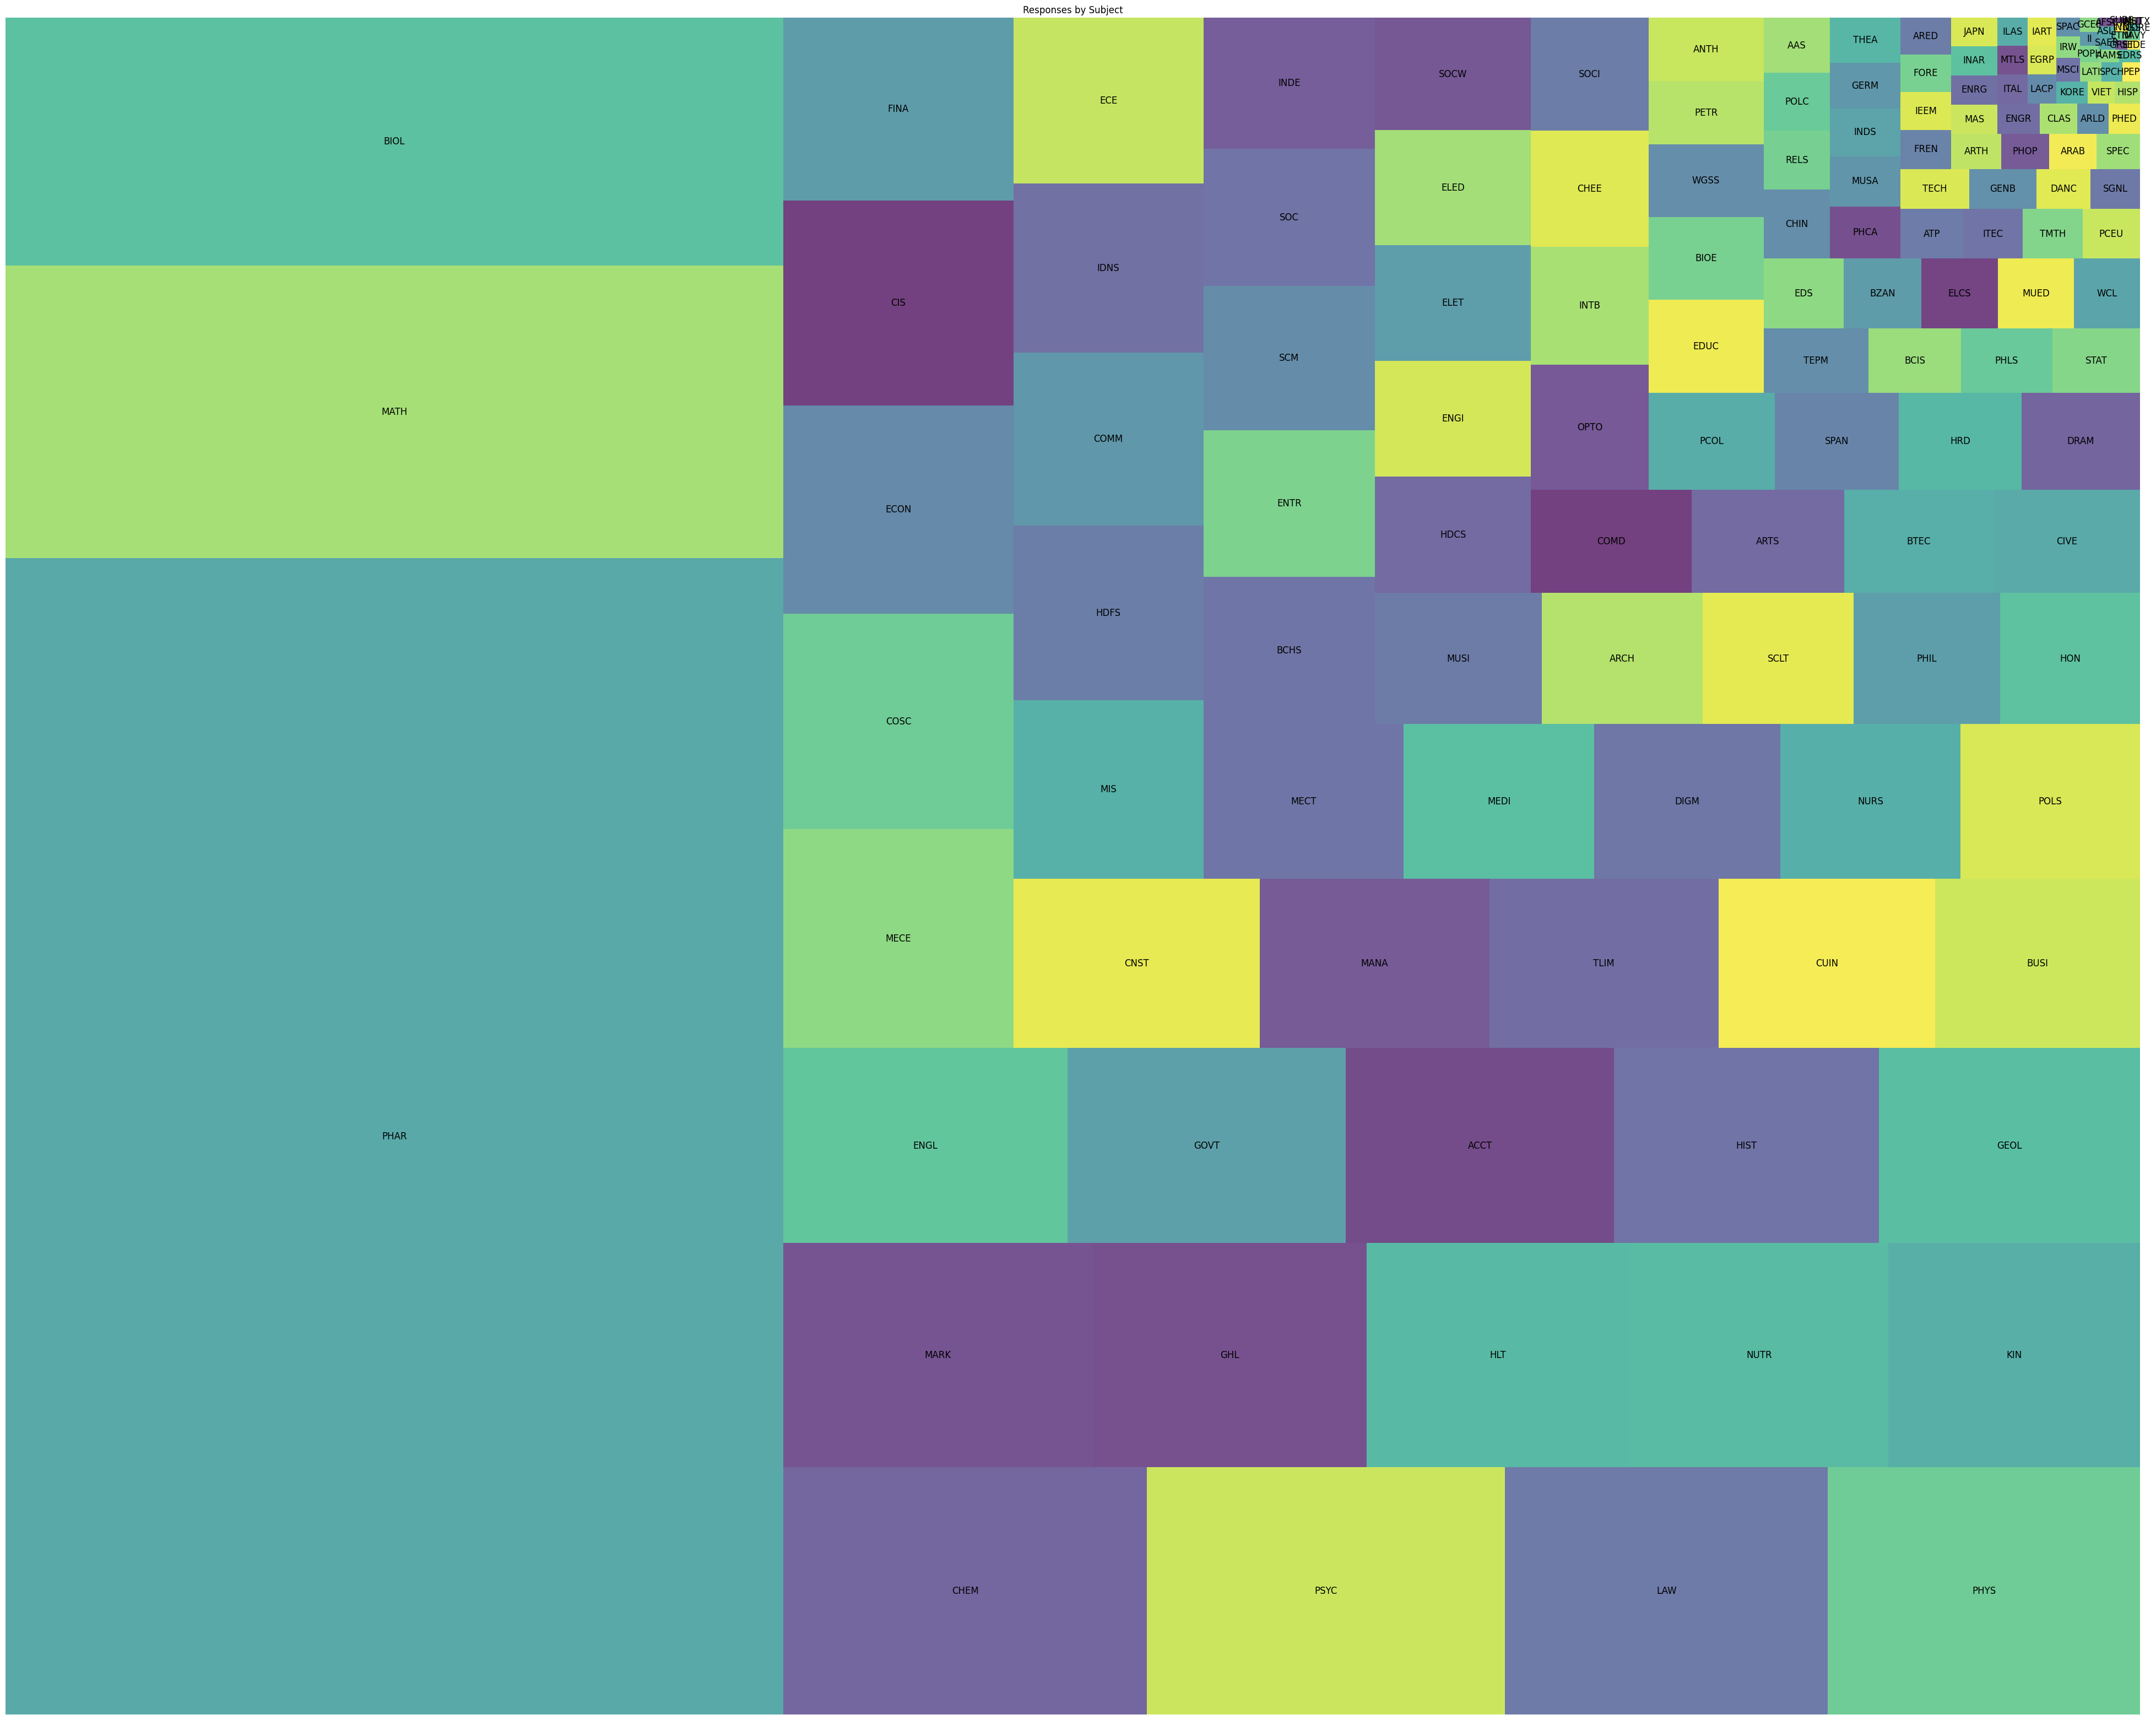

In [47]:
# use squarify to plot the responses by subject
# set the figure size
plt.figure(figsize=(50, 40))
# plot the treemap
sqfy.plot(sizes=df_responses['Subject'].value_counts(), label=df_responses['Subject'].value_counts().index, text_kwargs={'fontsize': 12}, alpha=0.75)
plt.axis('off')
plt.title('Responses by Subject')


Text(0.5, 1.0, 'Responses by Department + Course')

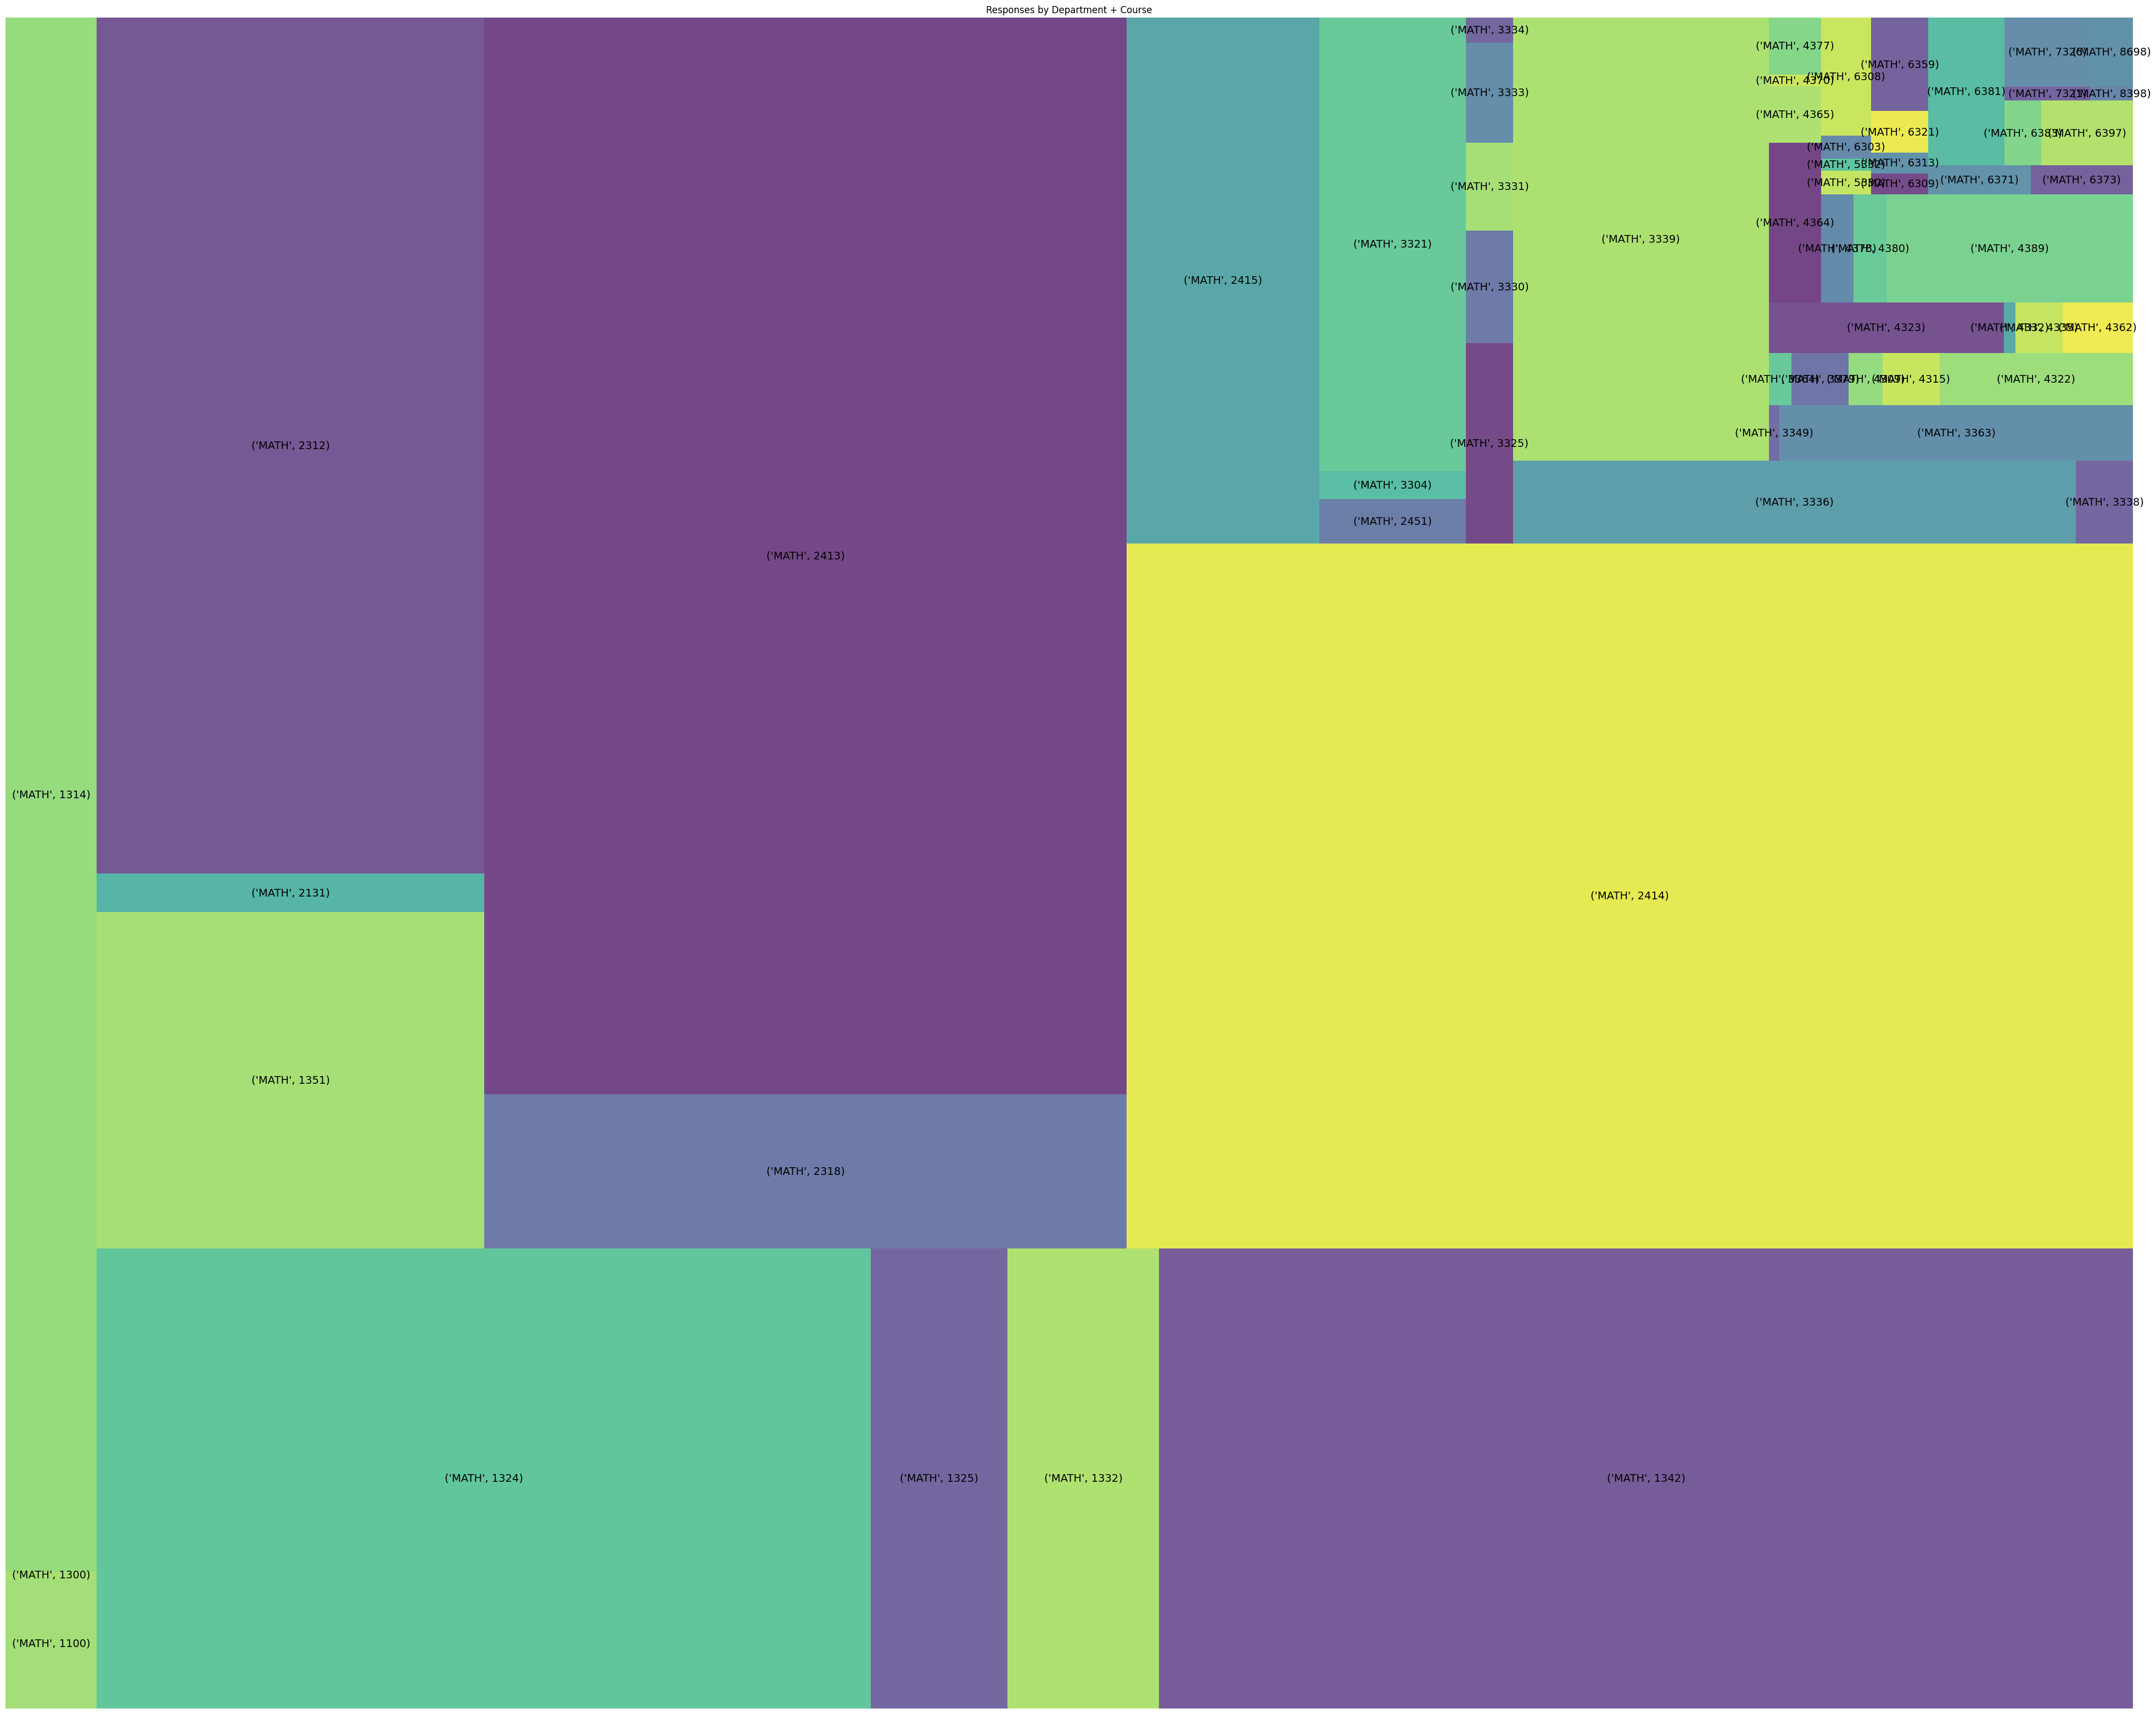

In [48]:
# now we do a tree map by the department + course : 
# department is subject and course is catalog, so group on two fields
# set the figure size
plt.figure(figsize=(50, 40))
# filter and plot only for math department
df_math = df_responses.loc[df_responses['Subject'] == 'MATH']
# plot the treemap
sqfy.plot(sizes=df_math.groupby(['Subject', 'Catalog']).size(), label=df_math.groupby(['Subject', 'Catalog']).size().index, text_kwargs={'fontsize': 14}, alpha=0.75)
plt.axis('off')
plt.title('Responses by Department + Course')


Text(0.5, 1.0, 'Responses by Department + Course')

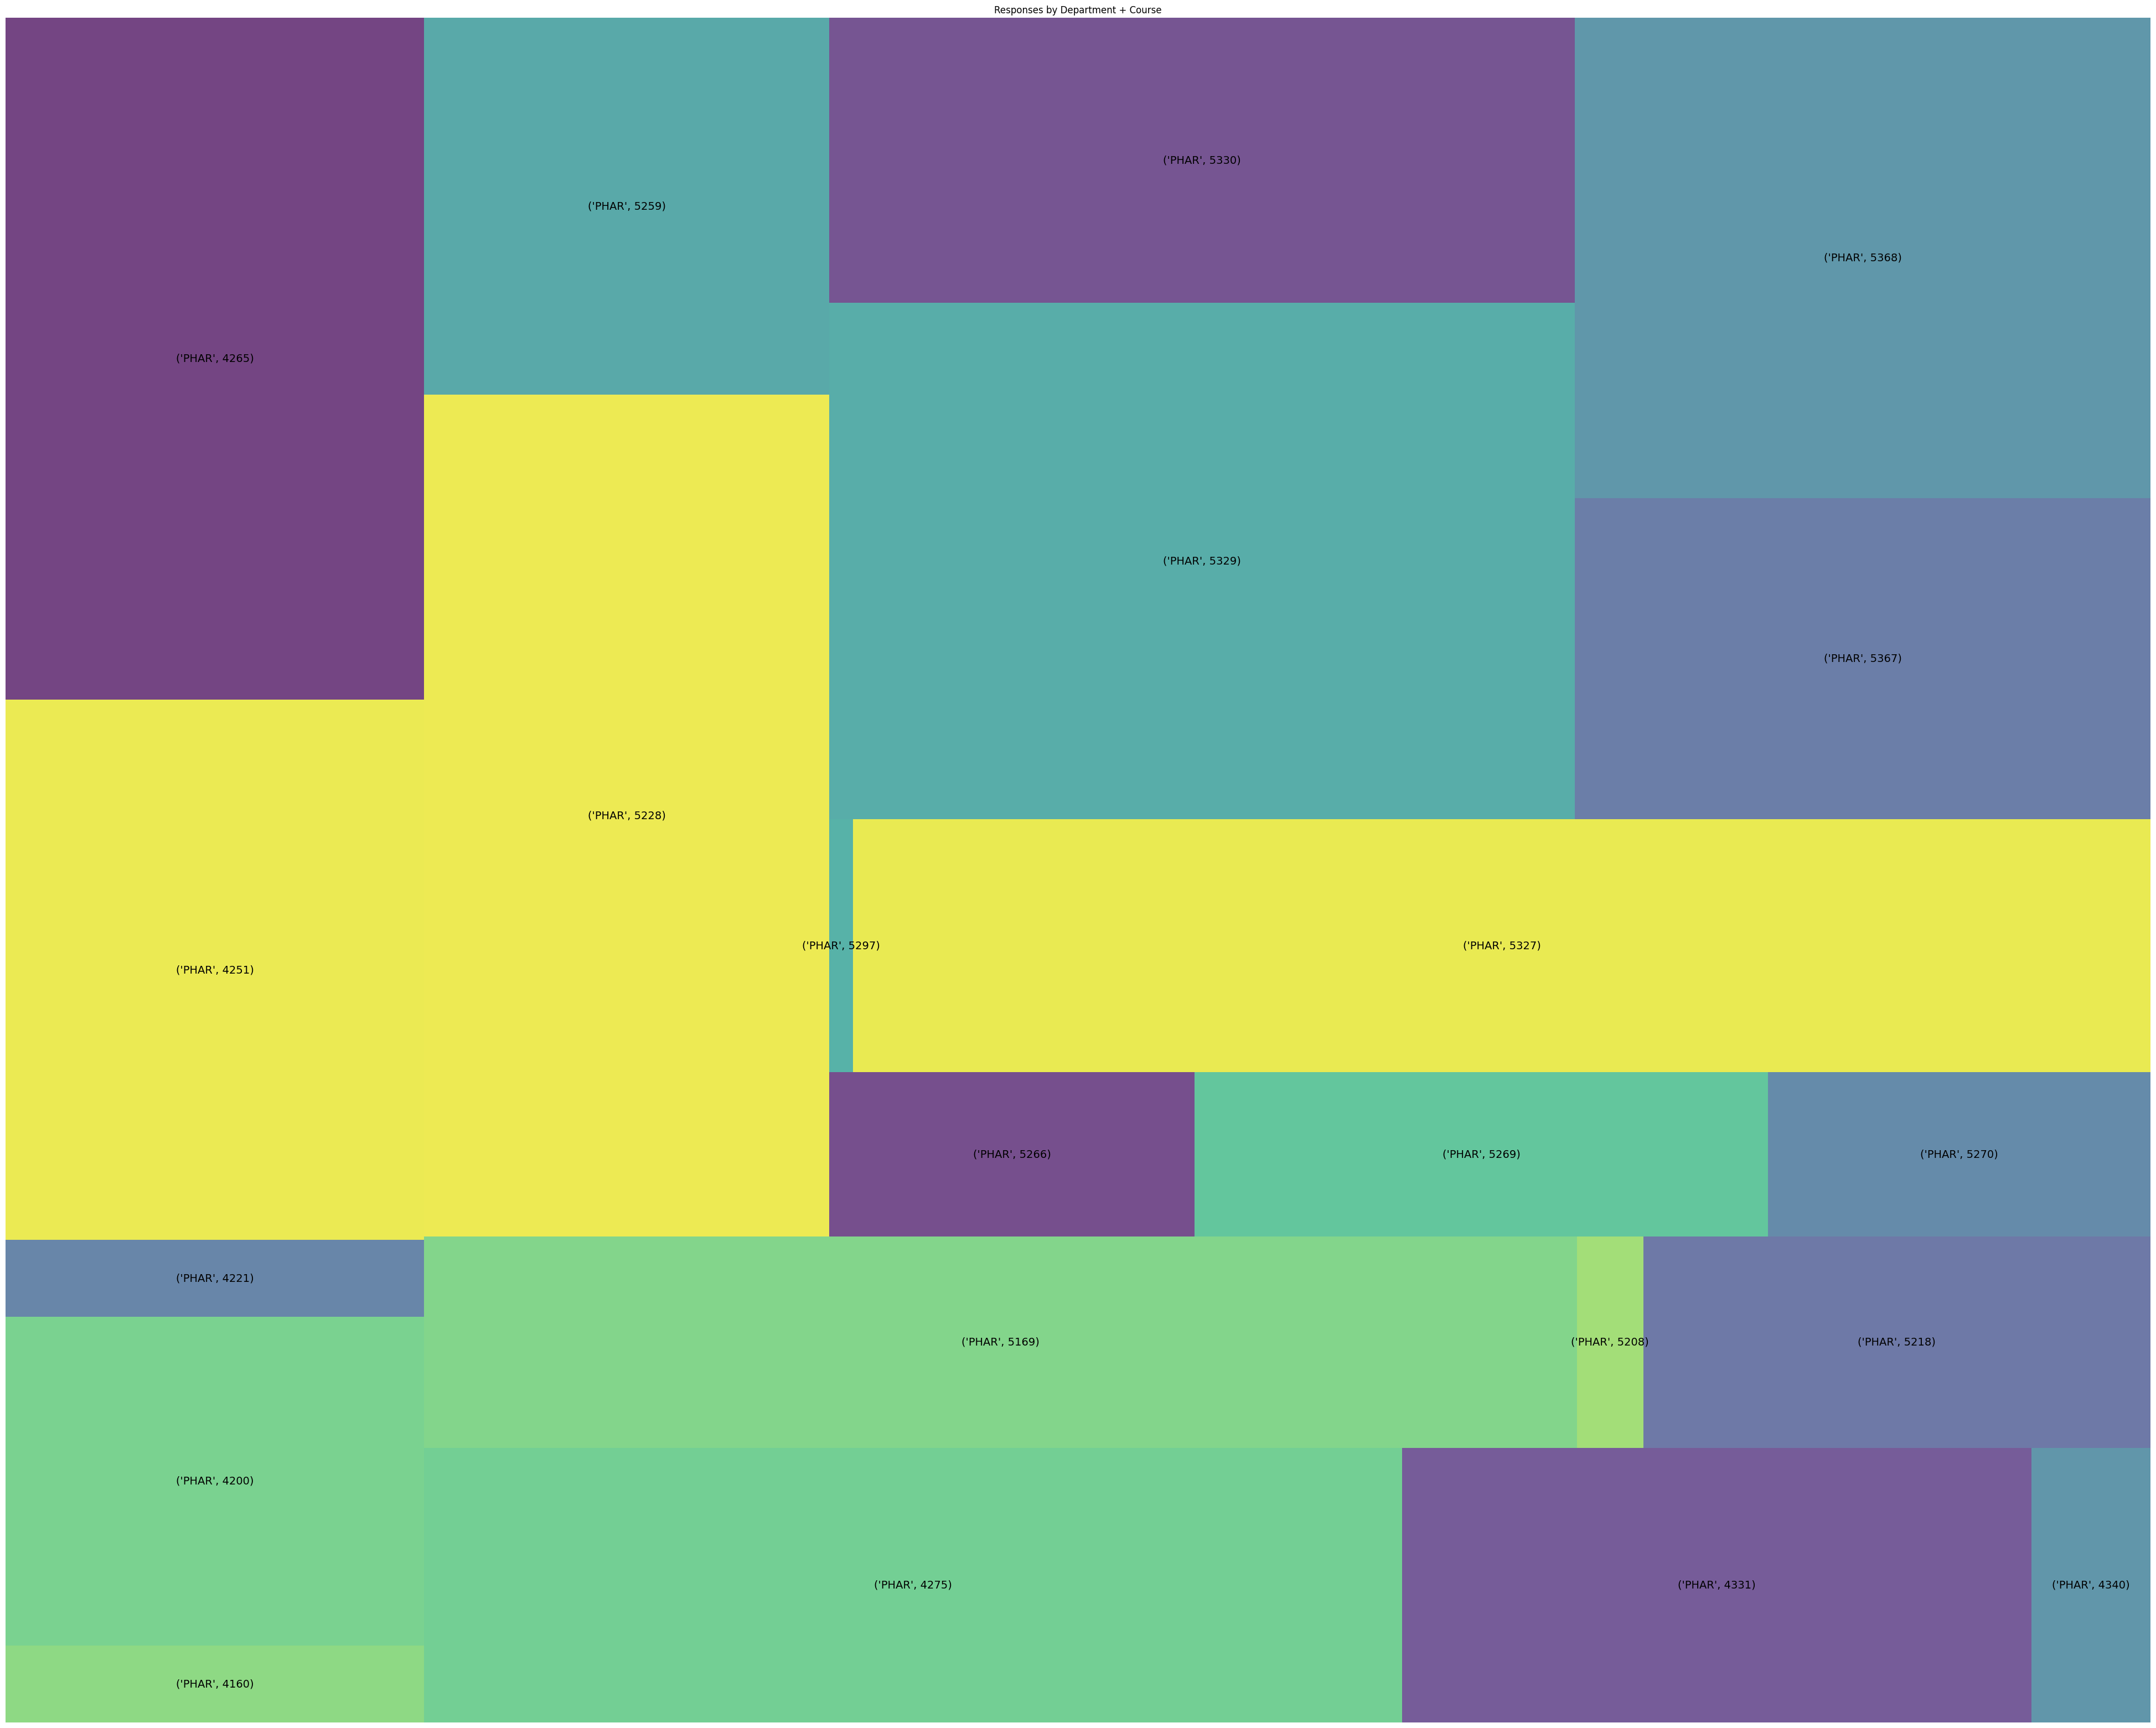

In [49]:
# now we do a tree map by the department + course : 
# department is subject and course is catalog, so group on two fields
# set the figure size
plt.figure(figsize=(50, 40))
# filter and plot only for pharmacy department
df_phar = df_responses.loc[df_responses['Subject'] == 'PHAR']
# plot the treemap
sqfy.plot(sizes=df_phar.groupby(['Subject', 'Catalog']).size(), label=df_phar.groupby(['Subject', 'Catalog']).size().index, text_kwargs={'fontsize': 14}, alpha=0.75)
plt.axis('off')
plt.title('Responses by Department + Course')


In [50]:
# now we need to do a count 
# also for each acad unit, how many number of subjects
# and for each subject, how many number of catalogs
# and then for each catalog, how many number of sections

# Acad units count: Colleges
cnt_acad_units = len(df_responses['AcadGroup'].unique())
print(f"Distinct academic groups: {cnt_acad_units}")

# Subjects count : Departments
# list distinct subjects
cnt_subjects = len(df_responses['Subject'].unique())
print(f"Distinct subjects: {cnt_subjects}")

# Catalogs count : Courses
# list distinct subject+catalogs
cnt_catalogs = df_responses.groupby(['Subject', 'Catalog']).size()
print(f"Distinct subject+catalogs: {len(cnt_catalogs)}")

# Sections count
# list distinct subject+catalog+ClassNbr
cnt_sections = df_responses.groupby(['Subject', 'Catalog', 'ClassNbr']).size()
print(f"Distinct subject+catalog+sections: {len(cnt_sections)}")

# distinct form numbers
cnt_forms = len(df_responses['EvaluationForm'].unique())    
print(f"Distinct forms: {cnt_forms}")


Distinct academic groups: 19
Distinct subjects: 144
Distinct subject+catalogs: 2477
Distinct subject+catalog+sections: 5037
Distinct forms: 39


In [51]:
# print all the distinct forms in the df_responses
print("\nDistinct forms:")
forms_in_responses = df_responses['EvaluationForm'].unique()
forms_in_responses.sort()
for form in forms_in_responses:
    print(form)
    # check to see if it exists in df_questions
    # if so print the questions, otherwise print "No form found"
    if form in df_questions['FormNumber'].unique():
        # print(df_questions.loc[df_questions['FormNumber'] == form]['Question'])
        print('Form found')
    else:
        print("No form found")



Distinct forms:
0
No form found
6
Form found
7
Form found
9
Form found
10
Form found
11
Form found
12
Form found
13
Form found
14
Form found
15
Form found
16
Form found
17
Form found
18
Form found
19
Form found
20
Form found
21
Form found
22
Form found
24
Form found
33
Form found
35
Form found
43
Form found
44
Form found
45
Form found
50
Form found
64
Form found
105
Form found
108
Form found
146
Form found
207
Form found
222
Form found
351
Form found
352
Form found
521
Form found
522
Form found
701
Form found
704
Form found
706
Form found
710
Form found
711
Form found


In [52]:
# sentiment analysis
def sentiment_analysis(text):
    sentiment_pipeline = pipeline("sentiment-analysis", model="distilbert/distilbert-base-uncased-finetuned-sst-2-english")
    # print(f"text: {text}")
    return sentiment_pipeline(text)


In [53]:

def summarizer(model, text):
    summarizer = pipeline("summarization", model=model)
    cnt_word_tokens = int(len(text.split()))
    min_length = int(0.1*cnt_word_tokens)
    max_length = int(0.2*cnt_word_tokens)
    return summarizer(text, min_length=min_length, max_length=max_length, do_sample = False)


In [55]:
# now we need to iterate through each section
# get the form number for each section
# look up the questions for each section df_questions
# then we can get the responses for each question for each section df_responses
# for each response we can do sentiment analysis - use hugging face transformers library
# then we count how many are +ve, -ve and neutral
# then we concatenate all the comments for the question for each section
# and then summarize the comments for each question for each section
# then we write it to a file
def process_section(instructor, subject, catalog, section_nunber, df_section_responses, df_questions):
    print("="*88)
    print(f"Section: {section_nunber}")
    # print(df_section_responses.head())
    # print("-"*50)
    print(f"Number of responses: {len(df_section_responses)}")
    # does it have a form number?
    form_numbers = df_section_responses['EvaluationForm'].unique()
    if len(form_numbers) == 0:
        print("No form number found")
        return
    elif len(form_numbers) > 1:
        print("Multiple form numbers found")
        return
    else:
        form_number = form_numbers[0]
        print(f"Form number: {form_number}")
        # get the questions for the form number
        df_form_questions = df_questions.loc[df_questions['FormNumber'] == form_number]
        print(f"Number of questions: {len(df_form_questions)}")
        print(f"Questions: {df_form_questions}")

        # for each question, get the responses
        # comments column is the one we are interested in
        # but naming of column is not clear, so we will use the index
        comment_starting_index = 12
        comment_iter = 0
        for index, row in df_form_questions.iterrows():
            print(f"index = {index}")
            question = row['Question']
            print(f"Question: {question}")
            # get the responses for the question
            # get the column name
            column_name = df_section_responses.columns[comment_starting_index + comment_iter]

            # bump comment_iter so for next question, we pick the next column
            comment_iter += 1

            print(f"Column name: {column_name}")
            # get the responses
            responses = df_section_responses[column_name]
            print(f"Number of responses: {len(responses)}")

            # clean out the responses
            # remove nan, empty strings
            responses = responses.dropna()
            responses = responses[responses != '']

            print(f"Number of responses after cleaning: {len(responses)}")
            # print(f"Responses: {responses}")

            # sentiment analysis
            # convert responses to list of strings
            if len(responses) == 0:
                print("No responses to analyze for sentiments")
            else:
                responses = responses.tolist()
                sentiments = sentiment_analysis(responses)
                # print(sentiments)
                
            # summarize the comments
            SUMMARIZER_LOWER_LIMIT = 200
            
            # remove newline from within each individual response/comment
            responses = [response.replace('\n', ' ') for response in responses]

            # concatenate the comments with a newline
            comments = '|'.join(responses)

            len_comments = len(comments)
            print(f"Length of comments: {len_comments}")
            if len_comments < SUMMARIZER_LOWER_LIMIT:
                print("Not enough comments to summarize")
                summary = comments
            else:
                print("="*88)
                print(f"len_comments: {len_comments}")
                # print(comments)
                model = "allenai/led-base-16384"
                model = "google-t5/t5-small"
                summary = summarizer(model, comments)
                summary_text = summary[0]['summary_text']
                # print("-"*88)
                print(f"len_summary: {len(summary_text)}")
                # print(summary_text)
                print(summary_text)

            # write to a file
            # create a file in data/out folder
            # file name has to be subject_catalog_section_instructor_qNo.txt
            # write the question, responses, sentiments, summary
            # create folder for model if it doesn't exist
            # replace '/' in model with - to avoid creating subfolders
            model = model.replace('/', '-')
            if not os.path.exists(f"../data/out/{model}"):
                os.makedirs(f"../data/out/{model}")
            file_name = f"../data/out/{model}/{subject}_{catalog}_{section_nunber}_{instructor}_{column_name}.txt"
            with open(file_name, 'w') as file:
                file.write(f"Question: {question}\n")
                file.write(f"Responses: {len(responses)}\n")
                file.write(f"Comments: {comments}\n")
                file.write(f"Sentiments: {sentiments}\n")
                file.write(f"Summary: {summary_text}\n")
            # close the file
            

    

# we get the list of distinct sections (classNbr)
# then for each ClassNbr we filter out its responses 
distinct_sections = df_responses['ClassNbr'].unique()
print(f"Distinct sections: {len(distinct_sections)}")

processed = False
for section_nunber in distinct_sections:
    if section_nunber == "10989A":
        # InstructorName,Subject,Catalog,ClassNbr,Term,SessionCode,distanceed,EvaluationForm,Comment1,Column2,Comment2,Column3,Comment3,Column4,Comment4,Column5,Comment5,Column6,Comment6,Column7,Comment7,Column8,Comment8,Column9,Comment9,Column10,Comment10,Column11,Comment11,,
        df_section_responses = df_responses.loc[df_responses['ClassNbr'] == section_nunber]

        # get the instructor, subject, catalog
        instructor = df_section_responses['InstructorName'].iloc[0]
        subject = df_section_responses['Subject'].iloc[0]
        catalog = df_section_responses['Catalog'].iloc[0]

        print(f"Now processing section: {section_nunber}")
        process_section(instructor, subject, catalog, section_nunber, df_section_responses, df_questions)
        processed = True
    
    if processed: break
    
    
   

Distinct sections: 4786
Now processing section: 10989A
Section: 10989A
Number of responses: 66
Form number: 13
Number of questions: 3
Questions:     FormNumber                                           Question  Unnamed: 2
18          13  What have you liked most about this course and...         NaN
19          13  What have you liked least about this course an...         NaN
20          13                     Other comments and suggestions         NaN
index = 18
Question: What have you liked most about this course and why?
Column name: Comment1
Number of responses: 66
Number of responses after cleaning: 49


C:\Users\mmavurap\AppData\Roaming\Python\Python311\site-packages\huggingface_hub\file_download.py:1132: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(
All PyTorch model weights were used when initializing TFDistilBertForSequenceClassification.

All the weights of TFDistilBertForSequenceClassification were initialized from the PyTorch model.
If your task is similar to the task the model of the checkpoint was trained on, you can already use TFDistilBertForSequenceClassification for predictions without further training.


Length of comments: 7570
len_comments: 7570


All PyTorch model weights were used when initializing TFT5ForConditionalGeneration.

All the weights of TFT5ForConditionalGeneration were initialized from the PyTorch model.
If your task is similar to the task the model of the checkpoint was trained on, you can already use TFT5ForConditionalGeneration for predictions without further training.
Token indices sequence length is longer than the specified maximum sequence length for this model (1690 > 512). Running this sequence through the model will result in indexing errors
C:\Users\mmavurap\AppData\Roaming\Python\Python311\site-packages\transformers\generation\tf_utils.py:745: UserWarning: You have modified the pretrained model configuration to control generation. This is a deprecated strategy to control generation and will be removed soon, in a future version. Please use a generation configuration file (see https://huggingface.co/docs/transformers/main_classes/text_generation)
  warnings.warn(


len_summary: 607
i liked the lectures because each professor explores a range of different motifs and themes for each book with unique perspectives . the professors brought out significant meaning to the texts, and each professor provided their own way to make the lectures engaging . i enjoyed the lectures as they presented a different version of how the text should be interpreted, and the lectures were insightful and helpful . I liked how the instructors always had well-planned and thought out lectures, and how they all contributed in different ways to the theme of belonging this semester .)) i . and . many of the .
index = 19
Question: What have you liked least about this course and why?
Column name: Column2
Number of responses: 66
Number of responses after cleaning: 43


All PyTorch model weights were used when initializing TFDistilBertForSequenceClassification.

All the weights of TFDistilBertForSequenceClassification were initialized from the PyTorch model.
If your task is similar to the task the model of the checkpoint was trained on, you can already use TFDistilBertForSequenceClassification for predictions without further training.


Length of comments: 9209
len_comments: 9209


All PyTorch model weights were used when initializing TFT5ForConditionalGeneration.

All the weights of TFT5ForConditionalGeneration were initialized from the PyTorch model.
If your task is similar to the task the model of the checkpoint was trained on, you can already use TFT5ForConditionalGeneration for predictions without further training.
Token indices sequence length is longer than the specified maximum sequence length for this model (2139 > 512). Running this sequence through the model will result in indexing errors


len_summary: 532
a lot of lectures were boring, but some were too fast to read . a few standout lectures that were enjoyable were done by Charara, Cooper, Vollrath, and Morrison . the course is literally ridiculous for non-humanities majors to take . it's a waste of a ton of my day, but there is no reason for me to waste my time reading books that are old and teach me very little, adam santos says. if you want to make ''....................... and...... but... and we ... and ... but the . and . many 'the . "the ... the ... ...... .. ... just .
index = 20
Question: Other comments and suggestions
Column name: Comment2
Number of responses: 66
Number of responses after cleaning: 16


All PyTorch model weights were used when initializing TFDistilBertForSequenceClassification.

All the weights of TFDistilBertForSequenceClassification were initialized from the PyTorch model.
If your task is similar to the task the model of the checkpoint was trained on, you can already use TFDistilBertForSequenceClassification for predictions without further training.


Length of comments: 3670
len_comments: 3670


All PyTorch model weights were used when initializing TFT5ForConditionalGeneration.

All the weights of TFT5ForConditionalGeneration were initialized from the PyTorch model.
If your task is similar to the task the model of the checkpoint was trained on, you can already use TFT5ForConditionalGeneration for predictions without further training.
Token indices sequence length is longer than the specified maximum sequence length for this model (876 > 512). Running this sequence through the model will result in indexing errors


len_summary: 275
this is to human situation as a course, and I hate this class . it's rubbing salt in the wound, but it is putting us back . this is 10 CREDITS for us, and for someone like me, i hate it even more . i haven't read a single book in both semesters and pulled through with an A .
